In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


## Oil, Gas & Other Fuels Futures Data
Historical data on Fuels and Energy Futures like Oil or Gas from Yahoo Finance.

https://www.kaggle.com/datasets/guillemservera/fuels-futures-data

## About Dataset

This dataset provides comprehensive and up-to-date information on futures related to oil, gas, and other fuels. Futures are financial contracts obligating the buyer to purchase and the seller to sell a specified amount of a particular fuel at a predetermined price and future date.

## Use Cases:

Trend Analysis: Scrutinize patterns and price fluctuations to anticipate future market directions in the energy sector.
Academic Research: Delve into the historical behavior of oil and gas prices and understand the influence of global events on these commodities.
Trading Strategies: Develop and test trading tactics based on the dynamics of oil, gas, and other fuel futures.
Risk Management: Utilize the dataset for hedging and risk management for corporations involved in the extraction, refining, or trading of fuels.
Dataset Image Source:
Photo by Pixabay: https://www.pexels.com/photo/industrial-machine-during-golden-hour-162568/

## Column Descriptions:

Date: The date when the data was documented. Format: YYYY-MM-DD.
Open: Market's opening price for the day.
High: Peak price during the trading window.
Low: Lowest traded price during the day.
Close: Price at which the market closed.
Volume: Number of contracts exchanged during the trading period.
Ticker: The unique market quotation symbol for the future.
Commodity: Specifies the type of fuel the future contract pertains to (e.g., crude oil, natural gas)

In [2]:
c_green = '#6DF10C'
c_yellow = '#F5DD0D'
c_cyan = '#0FFDEF'
c_blue = '#0141DE'
c_blue_light =  '#2775FD'
c_purple = '#FF0DE5'
e = np.e

In [3]:
df = pd.read_csv('csv\\all_fuels_data.csv')
df

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131
...,...,...,...,...,...,...,...,...
27375,BZ=F,Brent Crude Oil,2023-11-27,80.339996,81.180000,79.129997,79.980003,15161
27376,BZ=F,Brent Crude Oil,2023-11-28,80.139999,82.180000,79.830002,81.680000,15095
27377,BZ=F,Brent Crude Oil,2023-11-29,81.930000,83.239998,80.959999,83.099998,8045
27378,BZ=F,Brent Crude Oil,2023-11-30,82.870003,84.709999,82.669998,82.830002,59320


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27380 entries, 0 to 27379
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     27380 non-null  object 
 1   commodity  27380 non-null  object 
 2   date       27380 non-null  object 
 3   open       27380 non-null  float64
 4   high       27380 non-null  float64
 5   low        27380 non-null  float64
 6   close      27380 non-null  float64
 7   volume     27380 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum().sort_values(ascending=False)

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [6]:
df_numerical_cols = df.select_dtypes(np.number).columns.to_list()
df_numerical_cols

['open', 'high', 'low', 'close', 'volume']

In [7]:
df_categorical_cols = df.select_dtypes('object').columns.to_list()
df_categorical_cols

['ticker', 'commodity', 'date']

In [8]:
commodity = df['commodity'].unique()
commodity

array(['Crude Oil', 'Heating Oil', 'Natural Gas', 'RBOB Gasoline',
       'Brent Crude Oil'], dtype=object)

In [9]:
ticker = df['ticker'].unique()
ticker

array(['CL=F', 'HO=F', 'NG=F', 'RB=F', 'BZ=F'], dtype=object)

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27380 entries, 0 to 27379
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     27380 non-null  object        
 1   commodity  27380 non-null  object        
 2   date       27380 non-null  datetime64[ns]
 3   open       27380 non-null  float64       
 4   high       27380 non-null  float64       
 5   low        27380 non-null  float64       
 6   close      27380 non-null  float64       
 7   volume     27380 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
df_corr = df[df_numerical_cols].corr()
df_corr

,open,high,low,close,volume
open,1.000000,0.999848,0.999775,0.999650,0.313932
high,0.999848,1.000000,0.999684,0.999789,0.316748
low,0.999775,0.999684,1.000000,0.999859,0.310780
close,0.999650,0.999789,0.999859,1.000000,0.313604
volume,0.313932,0.316748,0.310780,0.313604,1.000000


<Axes: >

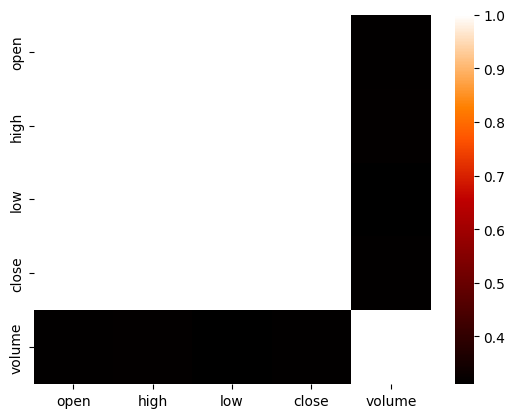

In [12]:
sns.heatmap(df_corr , cmap = "gist_heat")

In [13]:
commodity

array(['Crude Oil', 'Heating Oil', 'Natural Gas', 'RBOB Gasoline',
       'Brent Crude Oil'], dtype=object)

In [14]:
commodity_group = df.groupby(df['commodity'])

In [15]:
crude_oil_df = commodity_group.get_group('Crude Oil')
heating_oil_df = commodity_group.get_group('Heating Oil')
natural_gas_df = commodity_group.get_group('Natural Gas')
RROB_gasoline_df = commodity_group.get_group('RBOB Gasoline')
brent_crude_oil_df = commodity_group.get_group('Brent Crude Oil')

## Crude Oil Data Analysis


In [16]:
crude_oil_df

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131
...,...,...,...,...,...,...,...,...
5840,CL=F,Crude Oil,2023-11-27,75.309998,76.230003,74.059998,74.860001,289562
5841,CL=F,Crude Oil,2023-11-28,75.070000,77.019997,74.639999,76.410004,286618
5842,CL=F,Crude Oil,2023-11-29,76.559998,78.089996,75.669998,77.860001,322170
5843,CL=F,Crude Oil,2023-11-30,77.750000,79.599998,75.050003,75.959999,559169


In [17]:
crude_oil_df.describe()

,date,open,high,low,close,volume
count,5845,5845.000000,5845.000000,5845.000000,5845.000000,5.845000e+03
mean,2012-04-20 13:59:51.377245440,64.166866,65.162147,63.097379,64.160349,3.038125e+05
min,2000-08-23 00:00:00,-14.000000,13.690000,-40.320000,-37.630001,0.000000e+00
25%,2006-07-05 00:00:00,44.820000,45.849998,43.770000,44.750000,1.163680e+05
50%,2012-04-20 00:00:00,61.970001,62.919998,61.130001,62.009998,2.710940e+05
75%,2018-02-13 00:00:00,83.820000,85.199997,82.290001,83.760002,4.008360e+05
max,2023-12-01 00:00:00,145.190002,147.270004,143.220001,145.289993,2.288230e+06
std,NaN,25.494428,25.768844,25.189056,25.502668,2.141222e+05


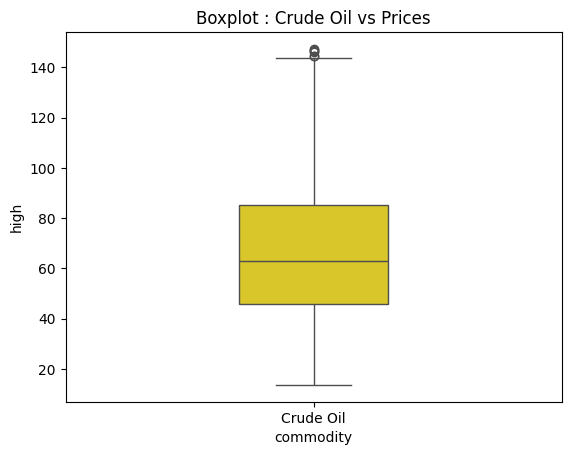

In [18]:
sns.boxplot(x = 'commodity' , y='high' , data = crude_oil_df ,legend = "auto" , width = 0.3 , color = c_yellow)
rcParams['figure.figsize'] = 8,6
plt.title('Boxplot : Crude Oil vs Prices')
plt.show()

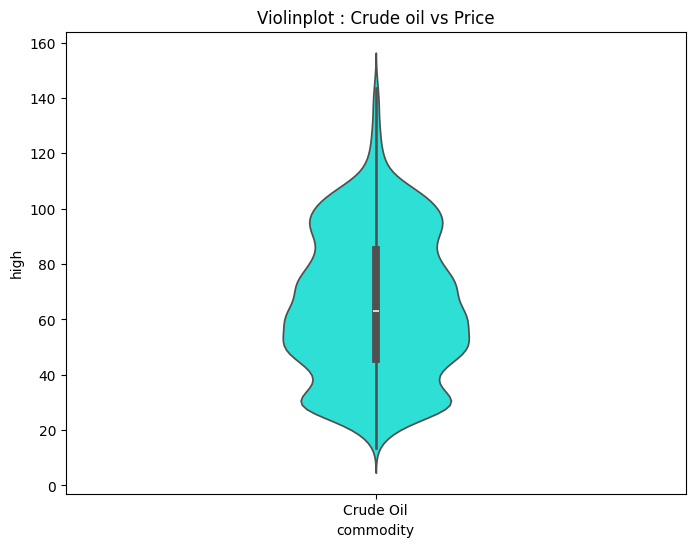

In [19]:
sns.violinplot(data = crude_oil_df , x = 'commodity' , y = 'high' , width = 0.3 , color = c_cyan)
plt.title('Violinplot : Crude oil vs Price')
rcParams['figure.figsize'] = 8,6
plt.show()

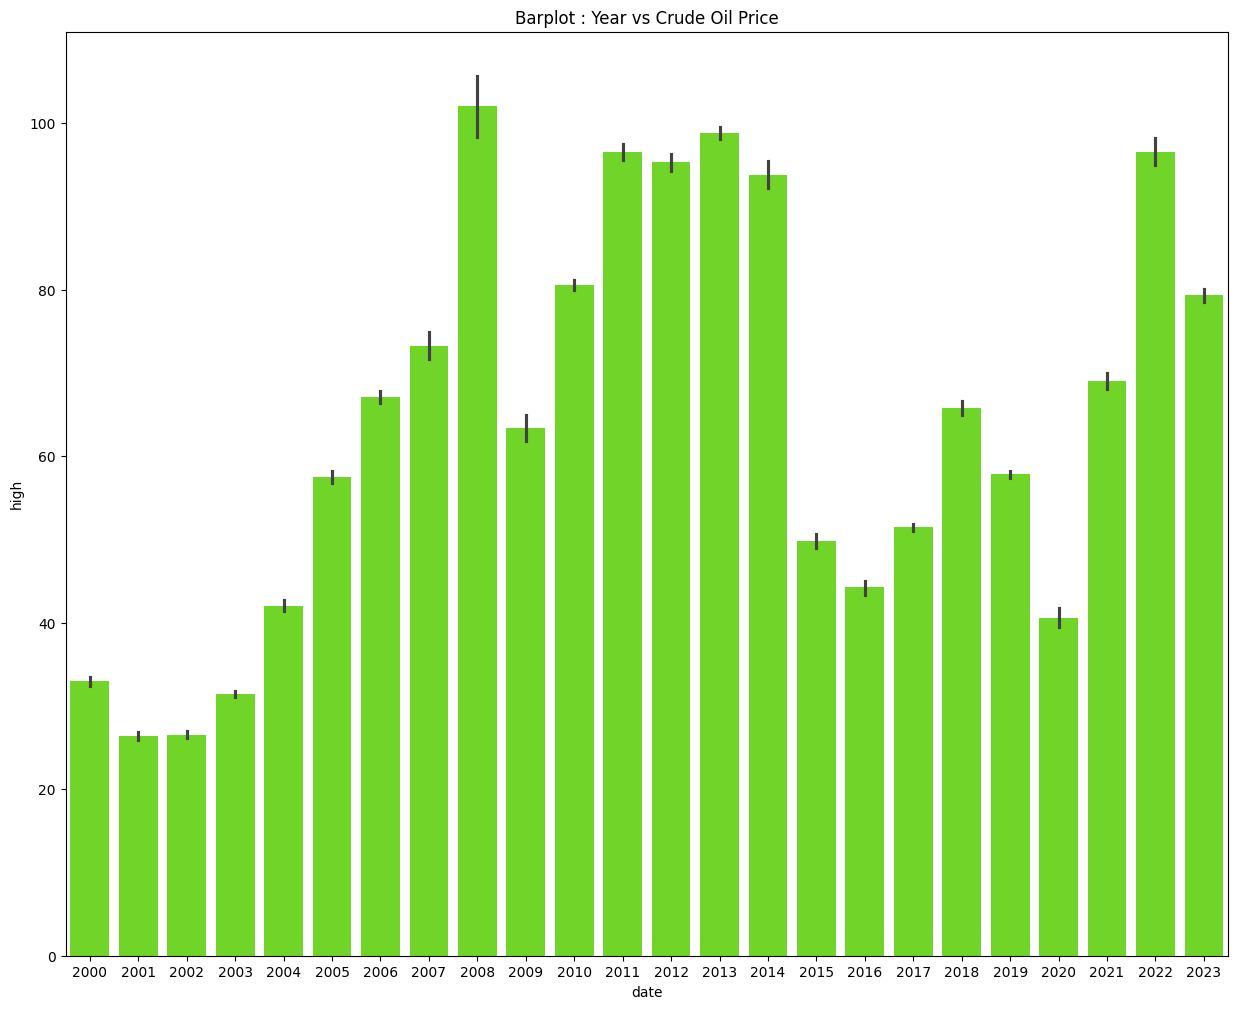

In [45]:
sns.barplot(x = pd.to_datetime(crude_oil_df['date']).dt.year , y = 'high', data = crude_oil_df,color = c_green )
rcParams['figure.figsize'] = 15,12
plt.title('Barplot : Year vs Crude Oil Price')
plt.show()

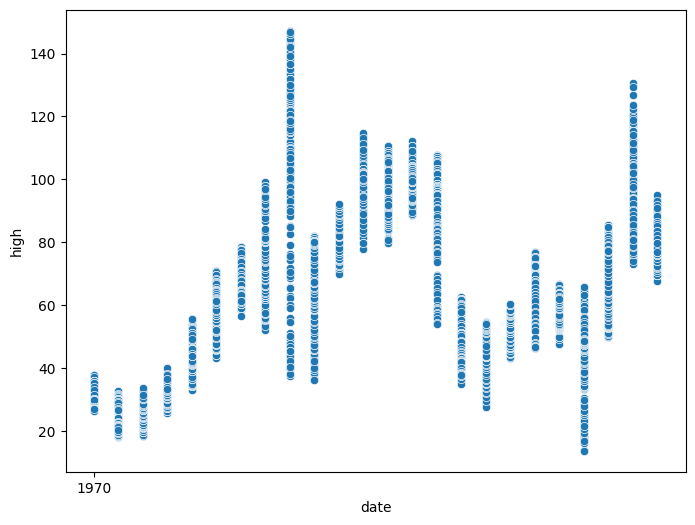

In [113]:
sns.scatterplot(x = pd.to_datetime(crude_oil_df['date'].dt.year) , y = 'high' , data = crude_oil_df)
plt.show()

In [111]:
crude_oil_year_df = crude_oil_df.groupby(pd.to_datetime(crude_oil_df['date'].dt.year))
crude_oil_year_df

In [115]:
crude_oil_2014 = crude_oil_year_df.get_group(2014)
crude_oil_2014

,ticker,commodity,date,open,high,low,close,volume
3349,CL=F,Crude Oil,2014-01-02,98.500000,98.970001,95.339996,95.440002,251248
3350,CL=F,Crude Oil,2014-01-03,95.470001,95.739998,93.860001,93.959999,215522
3351,CL=F,Crude Oil,2014-01-06,94.180000,94.589996,93.199997,93.430000,189379
3352,CL=F,Crude Oil,2014-01-07,93.599998,94.220001,93.349998,93.669998,177182
3353,CL=F,Crude Oil,2014-01-08,93.959999,94.180000,92.260002,92.330002,244855
...,...,...,...,...,...,...,...,...
3596,CL=F,Crude Oil,2014-12-24,56.799999,57.150002,55.070000,55.840000,174969
3597,CL=F,Crude Oil,2014-12-26,55.860001,56.590000,54.509998,54.730000,127202
3598,CL=F,Crude Oil,2014-12-29,55.049999,55.740002,52.900002,53.610001,241378
3599,CL=F,Crude Oil,2014-12-30,53.720001,54.320000,52.700001,54.119999,218557


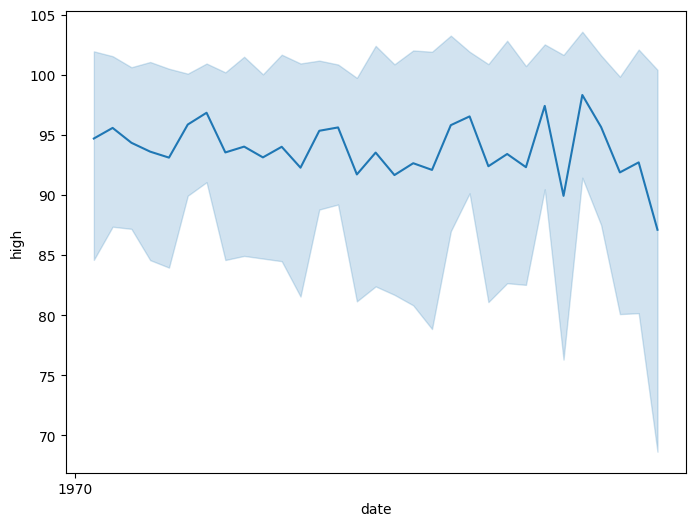

In [117]:
sns.lineplot(x = pd.to_datetime(crude_oil_2014['date'].dt.day) , y = 'high' , data = crude_oil_2014)
plt.show()

In [119]:
crude_oil_2014.describe()

,date,open,high,low,close,volume
count,252,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2014-07-02 19:31:25.714285824,93.043809,93.849286,92.057024,92.906786,253093.099206
min,2014-01-02 00:00:00,53.720001,54.020000,52.439999,53.270000,83702.000000
25%,2014-04-02 18:00:00,91.205000,92.014997,90.162500,90.940002,200156.500000
50%,2014-07-02 12:00:00,97.684998,98.584999,97.105000,97.744999,247244.500000
75%,2014-10-01 06:00:00,102.032499,102.860001,101.392500,102.147497,285628.000000
max,2014-12-31 00:00:00,107.419998,107.730003,106.570000,107.260002,552882.000000
std,NaN,13.144242,13.025726,13.488702,13.367084,80054.850905


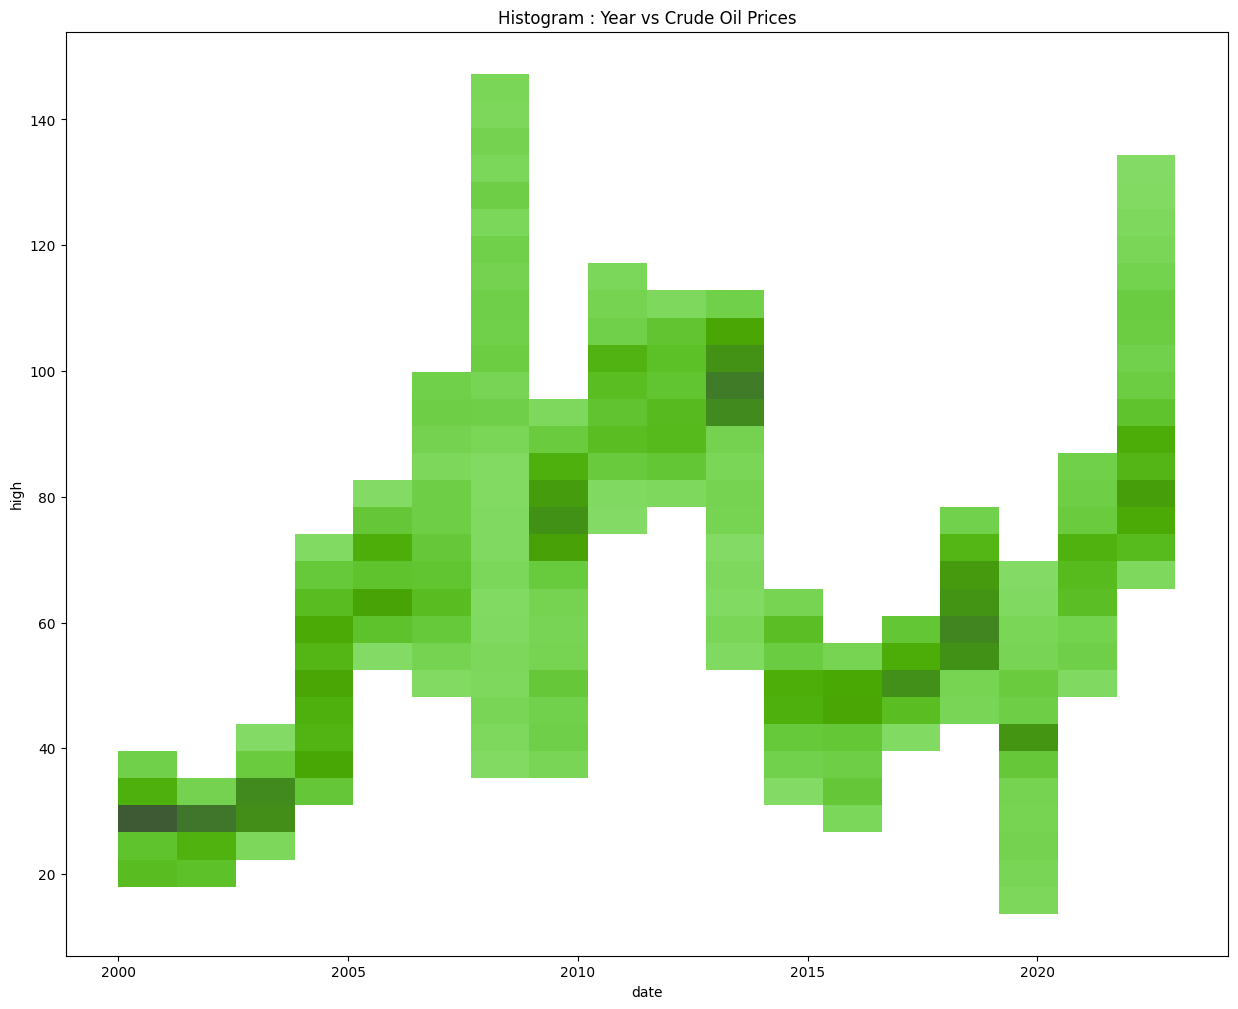

In [82]:
sns.histplot(x = pd.to_datetime(crude_oil_df['date']).dt.year , y = 'high', data = crude_oil_df , color = c_green  )
rcParams['figure.figsize'] = 15,12
plt.title('Histogram : Year vs Crude Oil Prices')
plt.show()

## On which date the price of Crude Oil was at its peak & low?

In [21]:
crude_oil_df[crude_oil_df['close'] == crude_oil_df['close'].max()]

,ticker,commodity,date,open,high,low,close,volume
1965,CL=F,Crude Oil,2008-07-03,144.190002,145.850006,143.220001,145.289993,193841


In [22]:
crude_oil_df[crude_oil_df['close'] == crude_oil_df['close'].min()]

,ticker,commodity,date,open,high,low,close,volume
4931,CL=F,Crude Oil,2020-04-20,17.73,17.85,-40.32,-37.630001,247947


In [94]:
crude_oil_df[crude_oil_df['volume'] == crude_oil_df['volume'].max()]

,ticker,commodity,date,open,high,low,close,volume
4932,CL=F,Crude Oil,2020-04-21,-14.0,13.86,-16.74,10.01,2288230


In [96]:
crude_oil_df[crude_oil_df['volume'] == crude_oil_df['volume'].min()]

,ticker,commodity,date,open,high,low,close,volume
36,CL=F,Crude Oil,2000-10-13,35.930000,35.959999,34.900002,35.049999,0
63,CL=F,Crude Oil,2000-11-21,35.400002,35.700001,35.000000,35.150002,0
121,CL=F,Crude Oil,2001-02-16,29.200001,29.250000,29.100000,29.160000,0
137,CL=F,Crude Oil,2001-03-13,27.799999,27.900000,27.450001,27.450001,0
262,CL=F,Crude Oil,2001-09-10,27.750000,28.000000,27.570000,27.629999,0
263,CL=F,Crude Oil,2001-09-14,29.980000,29.980000,29.450001,29.530001,0
5678,CL=F,Crude Oil,2023-04-06,80.370003,80.959999,79.650002,80.699997,0


## The high price of crude oil in 2008 was primarily driven by a combination of supply and demand factors, geopolitical events, and financial market dynamics. Here are some key factors that contributed to the spike in crude oil prices in 2008:

High Global Demand: The global demand for oil was consistently high, particularly from rapidly growing economies such as China and India. Increased industrialization and economic growth in these countries led to a surge in oil consumption.

Supply Concerns: There were concerns about the adequacy of oil supplies to meet the growing global demand. Political instability in oil-producing regions, particularly the Middle East, raised concerns about potential disruptions to the oil supply.

Geopolitical Tensions: The geopolitical landscape at the time was characterized by tensions in key oil-producing regions, including the Middle East. Geopolitical events, such as the Iraq War and tensions with Iran, contributed to uncertainty and speculation about potential disruptions to oil production and supply.

Weakening U.S. Dollar: The U.S. dollar experienced a period of weakness in 2008, and oil is priced in U.S. dollars globally. A weaker dollar typically leads to higher oil prices as it takes more dollars to purchase the same amount of oil.

Financial Speculation: The commodities market, including oil futures, saw increased speculative activity. Investors, seeking higher returns, poured money into commodity markets, contributing to higher oil prices. The financialization of commodities markets played a role in amplifying price volatility.

Supply Disruptions: There were specific supply disruptions during that period, including hurricanes in the Gulf of Mexico, which affected oil production and refining capacity.

Limited Spare Production Capacity: The global oil production capacity was relatively tight, with limited spare capacity. This lack of flexibility in the production system made the market more susceptible to disruptions and contributed to upward pressure on prices.

Increased Costs of Production: The costs of exploring, extracting, and refining oil were rising, contributing to higher prices. The increasing difficulty in finding and extracting new oil reserves added to these production costs.

The combination of these factors led to a perfect storm, causing crude oil prices to reach record highs in mid-2008, with prices exceeding $140 per barrel. However, the situation changed in the latter half of 2008 due to the global financial crisis, which led to a sharp decline in demand and a subsequent drop in oil prices.

## The 2008 financial crisis had a significant impact on crude oil prices, leading to a sharp and dramatic decline in the latter part of that year. Several interconnected factors contributed to this decline:

Global Economic Downturn: The financial crisis, triggered by the collapse of major financial institutions and the housing market in the United States, led to a severe global economic downturn. The crisis resulted in reduced consumer spending, industrial production, and overall economic activity worldwide.

Decreased Demand for Oil: As economies contracted, there was a substantial decrease in demand for oil. Industries scaled back production, and consumers cut back on discretionary spending, leading to a significant drop in the need for energy, including crude oil.

Financial Market Turmoil: The financial crisis caused widespread panic in financial markets. Investors faced significant losses, and there was a flight to liquidity, with many selling off assets, including commodities like oil, to raise cash or limit further losses.

Speculative Selling: The commodities market, including oil futures, experienced heavy selling as investors and speculators sought to reduce risk and cover losses incurred in other sectors. The financialization of commodities markets played a role in the magnitude of the price decline.

Global Recessionary Concerns: The financial crisis created concerns about a global recession, leading to further anxiety in commodity markets. The expectation of reduced economic activity and energy consumption further pushed oil prices downward.

Oversupply Concerns: Prior to the financial crisis, there was an increase in oil production and concerns about oversupply. The combination of reduced demand and fears of excess oil in the market intensified the downward pressure on prices.

As a result of these factors, crude oil prices, which had reached record highs earlier in 2008, experienced a rapid and substantial decline in the latter half of the year. By December 2008, oil prices had fallen to levels significantly below those seen in mid-2008. Brent and WTI crude oil prices, which had surpassed $140 per barrel in mid-2008, dropped to around $30-$40 per barrel by the end of 2008.

The impact of the financial crisis on oil prices underscored the interconnectedness of financial markets, economic activity, and commodity prices. The subsequent recovery of oil prices in the following years was influenced by factors such as production cuts, a gradual economic recovery, and continued global demand for energy.

## Heating Oil EDA

In [23]:
heating_oil_df

,ticker,commodity,date,open,high,low,close,volume
5845,HO=F,Heating Oil,2000-09-01,0.9850,0.9910,0.9705,0.9764,14679
5846,HO=F,Heating Oil,2000-09-05,0.9950,0.9980,0.9750,0.9797,17365
5847,HO=F,Heating Oil,2000-09-06,0.9850,1.0000,0.9810,0.9966,18879
5848,HO=F,Heating Oil,2000-09-07,0.9900,1.0300,0.9880,1.0295,23851
5849,HO=F,Heating Oil,2000-09-08,1.0120,1.0200,0.9910,0.9949,23189
...,...,...,...,...,...,...,...,...
11678,HO=F,Heating Oil,2023-11-27,2.8230,2.8778,2.7973,2.8379,27019
11679,HO=F,Heating Oil,2023-11-28,2.8399,2.9230,2.8300,2.9070,20530
11680,HO=F,Heating Oil,2023-11-29,2.8823,2.9127,2.8117,2.8885,25171
11681,HO=F,Heating Oil,2023-11-30,2.8780,2.9273,2.7961,2.8305,62136


In [24]:
heating_oil_df.describe()

,date,open,high,low,close,volume
count,5838,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000
mean,2012-04-25 03:54:34.409044224,1.973395,2.002780,1.943276,1.972886,38279.523810
min,2000-09-01 00:00:00,0.497000,0.507000,0.493000,0.499900,0.000000
25%,2006-07-11 06:00:00,1.384375,1.408925,1.359250,1.381750,22754.750000
50%,2012-04-24 12:00:00,1.910200,1.935450,1.886900,1.909100,34327.500000
75%,2018-02-14 18:00:00,2.681525,2.713950,2.640000,2.675425,51906.750000
max,2023-12-01 00:00:00,4.928300,5.859500,4.663500,5.135400,141299.000000
std,NaN,0.837406,0.850162,0.824891,0.837909,18937.511472


## On which date the price of Heating Oil was at its peak & low?

In [25]:
heating_oil_df[heating_oil_df['high'] == heating_oil_df['high'].max()]


,ticker,commodity,date,open,high,low,close,volume
11281,HO=F,Heating Oil,2022-04-29,4.9283,5.8595,4.4067,4.7817,42612


In [26]:
heating_oil_df[heating_oil_df['close'] == heating_oil_df['close'].min()]

,ticker,commodity,date,open,high,low,close,volume
6161,HO=F,Heating Oil,2001-12-11,0.499,0.507,0.496,0.4999,17772


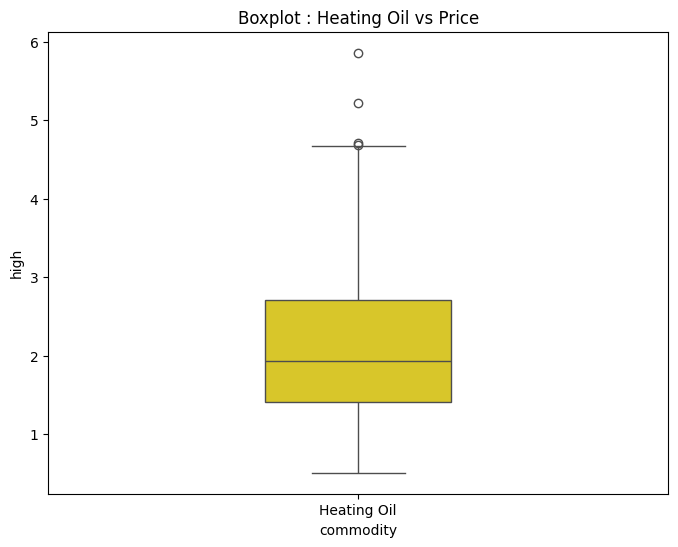

In [43]:
sns.boxplot(data = heating_oil_df , x = 'commodity' , y = 'high', width = 0.3 , color= c_yellow)
plt.title('Boxplot : Heating Oil vs Price')
rcParams['figure.figsize'] = 8,6
plt.show()

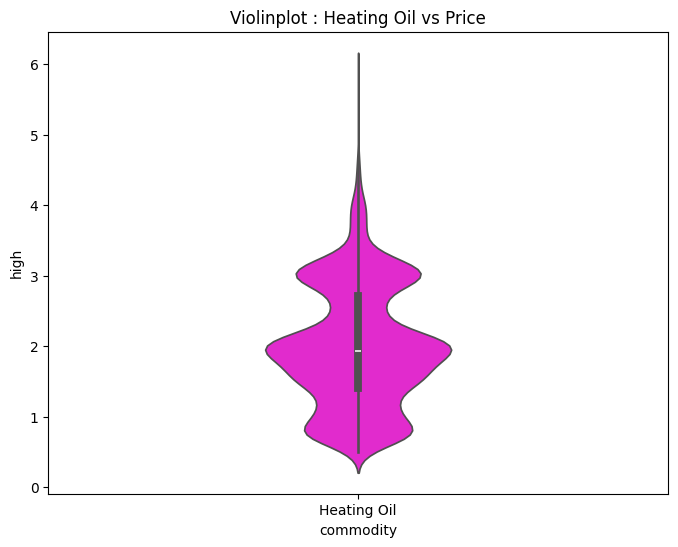

In [28]:
sns.violinplot(data = heating_oil_df , x = 'commodity' , y = 'high', width = 0.3 , color= c_purple)
plt.title('Violinplot : Heating Oil vs Price')
rcParams['figure.figsize'] = 8,6
plt.show()

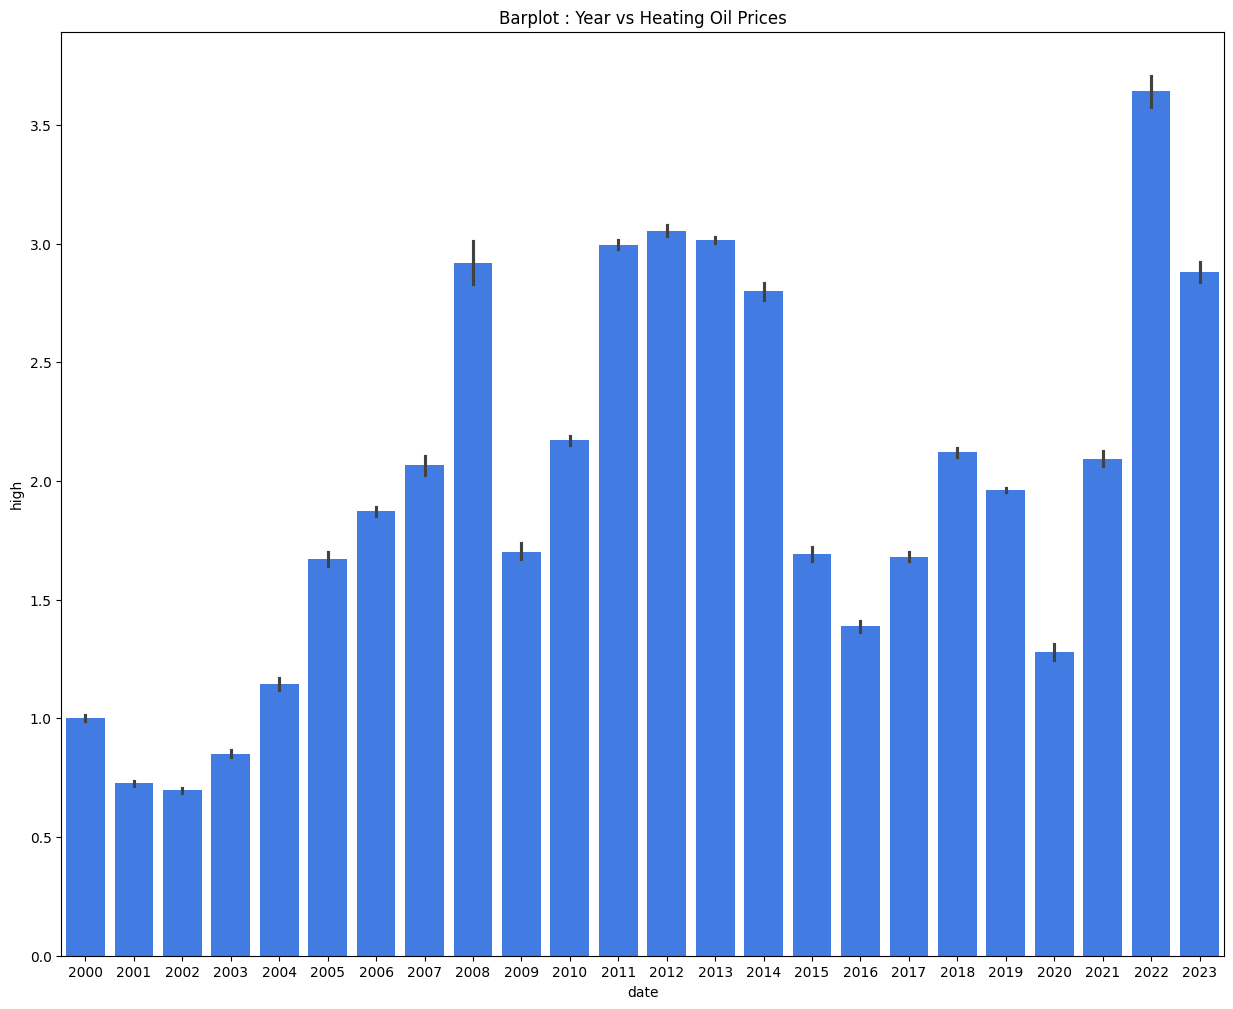

In [41]:
sns.barplot(x = pd.to_datetime(heating_oil_df['date']).dt.year , y = 'high', data = heating_oil_df,color = c_blue_light )
rcParams['figure.figsize'] = 15,12 
plt.title('Barplot : Year vs Heating Oil Prices')
plt.show()

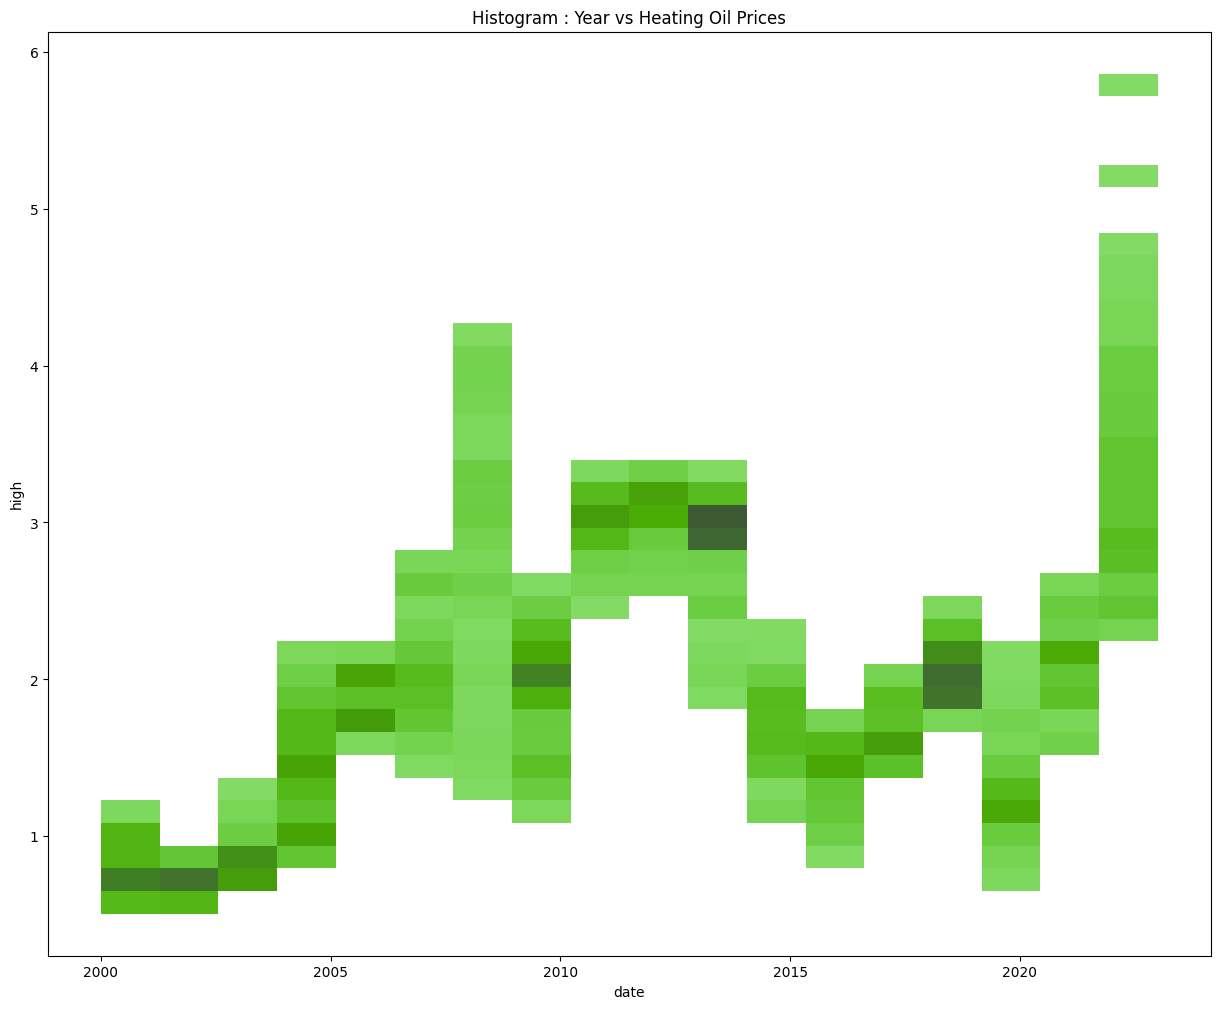

In [85]:
sns.histplot(x = pd.to_datetime(heating_oil_df['date']).dt.year , y = 'high', data = heating_oil_df, color = c_green ,  )
rcParams['figure.figsize'] = 15,12
plt.title('Histogram : Year vs Heating Oil Prices')
plt.show()

As of my last knowledge update in January 2022, I can provide a general overview of the history of heating oil prices from the year 2000 to that point. However, please note that I do not have real-time data, and you may want to check more recent and specific sources for the latest information on heating oil prices.

1. Early 2000s: In the early 2000s, heating oil prices were relatively stable, with fluctuations influenced by factors such as global economic conditions, supply and demand dynamics, and geopolitical events. Prices generally followed trends in the broader energy market.

2. Mid-2000s: Around the mid-2000s, heating oil, like other energy commodities, experienced a notable increase in prices. This was partly due to the surge in crude oil prices, reaching record highs in 2008. Geopolitical tensions, supply concerns, and increased global demand for energy contributed to the upward pressure on prices.

3. Late 2000s - 2010s: After the peak in 2008, heating oil prices, like crude oil prices, underwent a sharp decline in the latter part of 2008 and into 2009. The global financial crisis led to a decrease in demand, contributing to a drop in prices. Subsequently, prices gradually recovered but remained subject to various factors impacting the energy market.

4. 2014-2016: In the mid-2010s, heating oil prices experienced a decline, reflecting a broader trend in falling oil prices. Oversupply concerns, particularly in the context of increased U.S. shale oil production, contributed to lower prices during this period.

5. Late 2010s - Early 2020s: Heating oil prices, like other energy commodities, exhibited volatility during this period. Factors such as OPEC decisions, geopolitical tensions, and the global economic impact of the COVID-19 pandemic influenced the trajectory of prices. The pandemic, in particular, led to a significant drop in oil demand, affecting heating oil prices.



<img src="https://www.eia.gov/todayinenergy/images/2022.11.17/chart2.svg" width="720">


<img src="https://www.eia.gov/todayinenergy/images/2022.11.17/main.svg" width="720">


## Natural Gas EDA

In [30]:
natural_gas_df

,ticker,commodity,date,open,high,low,close,volume
11683,NG=F,Natural Gas,2000-08-30,4.650,4.815,4.630,4.805,34954
11684,NG=F,Natural Gas,2000-08-31,4.820,4.870,4.740,4.780,25787
11685,NG=F,Natural Gas,2000-09-01,4.750,4.860,4.750,4.835,113
11686,NG=F,Natural Gas,2000-09-05,4.850,4.975,4.840,4.960,26096
11687,NG=F,Natural Gas,2000-09-06,4.990,5.110,4.960,5.065,32764
...,...,...,...,...,...,...,...,...
17519,NG=F,Natural Gas,2023-11-27,2.778,2.820,2.709,2.794,67039
17520,NG=F,Natural Gas,2023-11-28,2.790,2.815,2.669,2.706,187190
17521,NG=F,Natural Gas,2023-11-29,2.792,2.870,2.760,2.804,141591
17522,NG=F,Natural Gas,2023-11-30,2.799,2.855,2.761,2.802,147752


In [31]:
natural_gas_df.describe()

,date,open,high,low,close,volume
count,5841,5841.000000,5841.000000,5841.000000,5841.000000,5841.000000
mean,2012-04-23 14:43:34.483821312,4.526713,4.633805,4.418011,4.521339,101438.779661
min,2000-08-30 00:00:00,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2006-07-10 00:00:00,2.833000,2.888000,2.780000,2.831000,45166.000000
50%,2012-04-24 00:00:00,3.883000,3.965000,3.809000,3.877000,96065.000000
75%,2018-02-14 00:00:00,5.710000,5.860000,5.570000,5.712000,143588.000000
max,2023-12-01 00:00:00,15.160000,15.780000,14.851000,15.378000,459196.000000
std,NaN,2.247544,2.311327,2.185885,2.246353,62687.627632


In [32]:
natural_gas_df[natural_gas_df['open'] == natural_gas_df['open'].max()]

,ticker,commodity,date,open,high,low,close,volume
13003,NG=F,Natural Gas,2005-12-14,15.16,15.545,14.57,14.679,25157


In [33]:
natural_gas_df[natural_gas_df['close'] == natural_gas_df['close'].min()]

,ticker,commodity,date,open,high,low,close,volume
16657,NG=F,Natural Gas,2020-06-25,1.595,1.598,1.44,1.482,62675


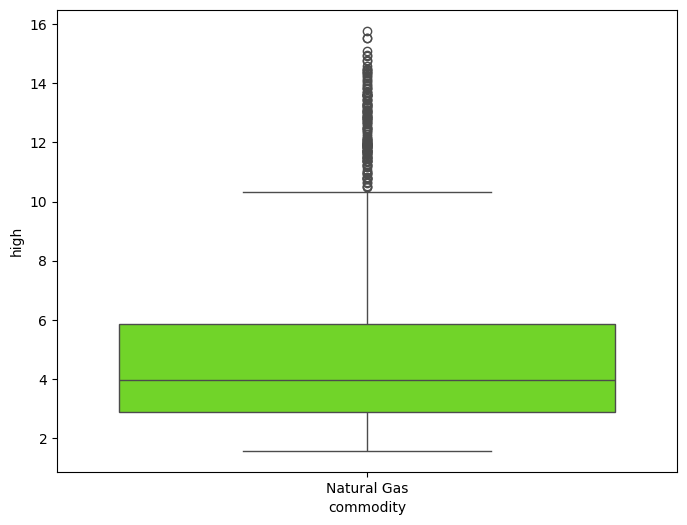

In [39]:
sns.boxplot(x = 'commodity' , y = 'high' , data = natural_gas_df , color = c_green)
plt.title('')
rcParams['figure.figsize'] = 8,6
plt.show()

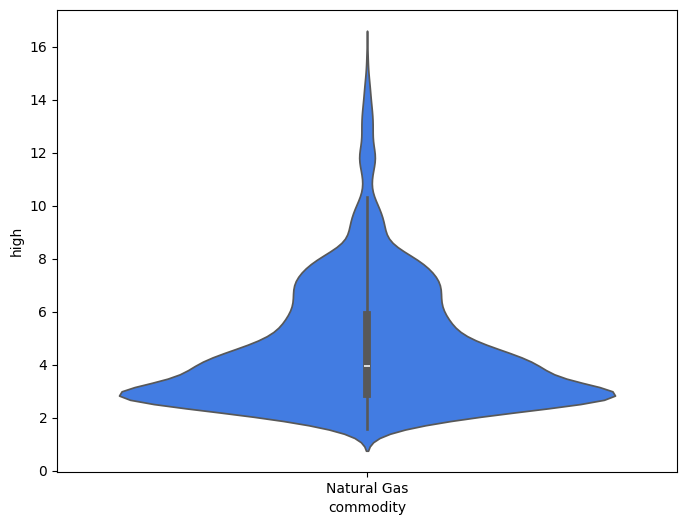

In [35]:
sns.violinplot(x = 'commodity' , y = 'high' , data = natural_gas_df , color = c_blue_light)
plt.title('')
rcParams['figure.figsize'] = 8,6
plt.show()

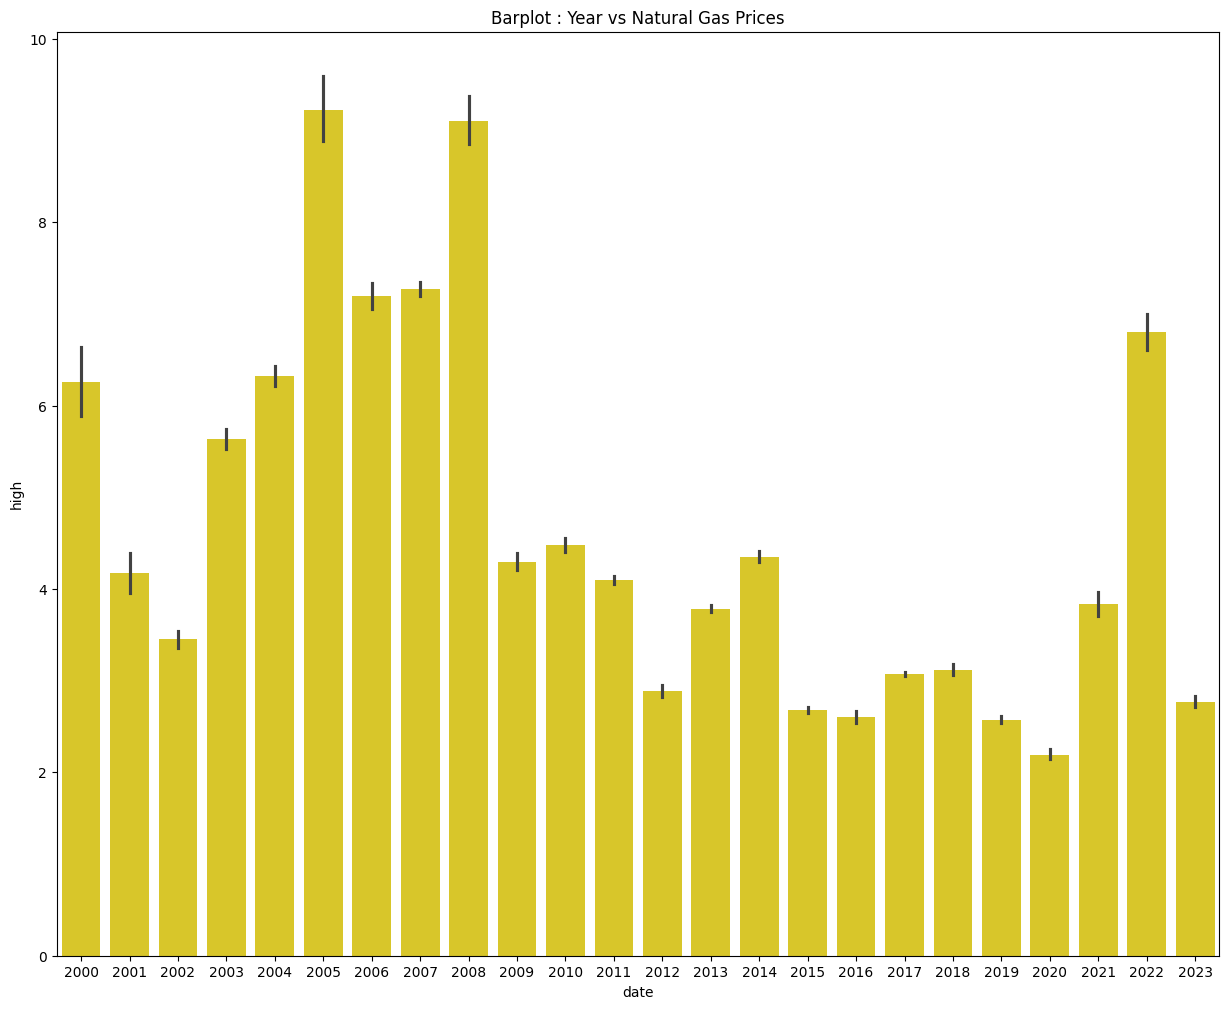

In [37]:
sns.barplot(x = pd.to_datetime(natural_gas_df['date']).dt.year , y = 'high', data = natural_gas_df , color = c_yellow )
rcParams['figure.figsize'] = 15,12
plt.title('Barplot : Year vs Natural Gas Prices')
plt.show()

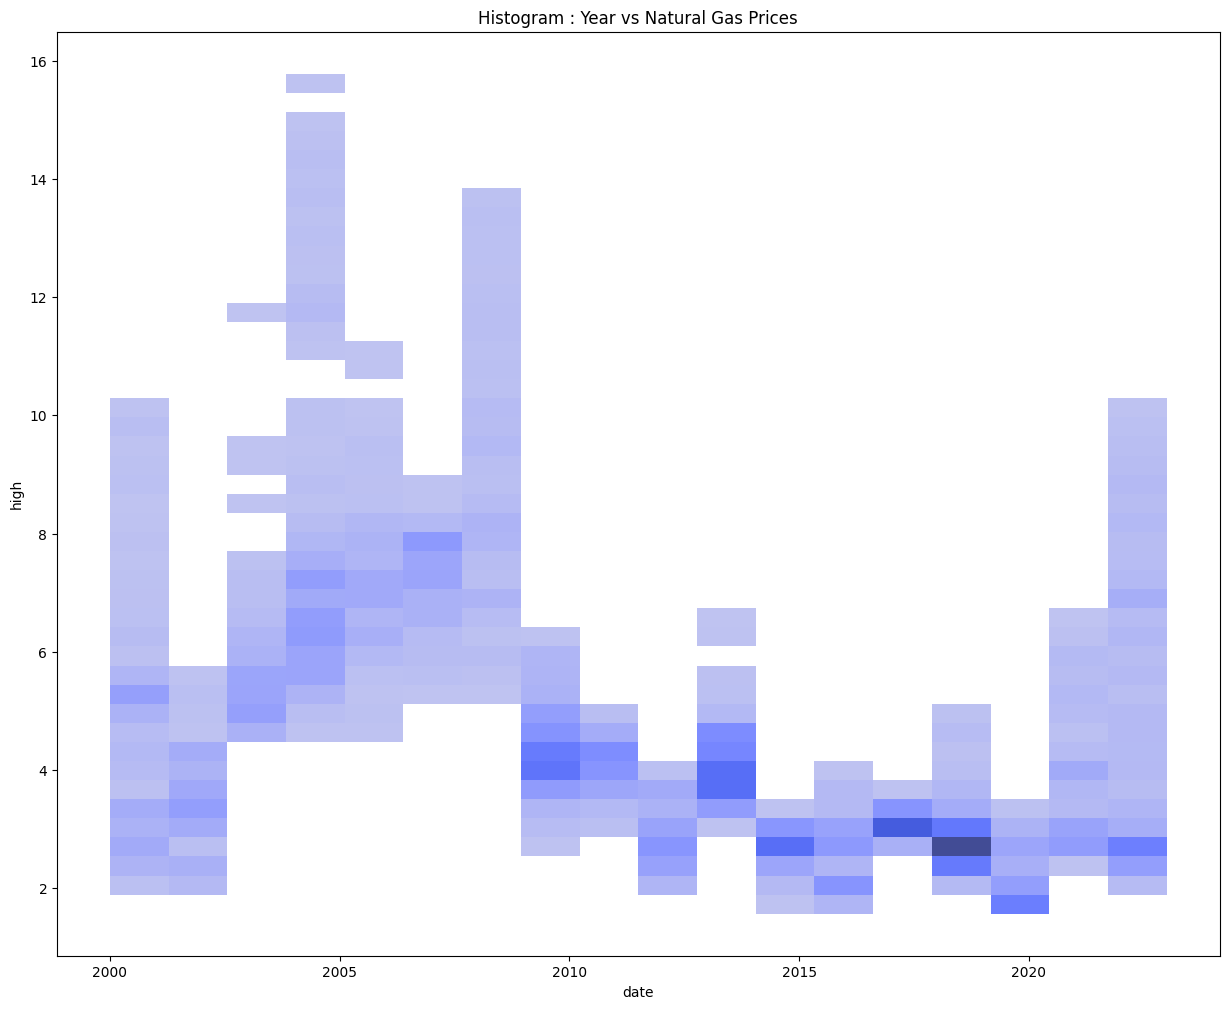

In [87]:
sns.histplot(x = pd.to_datetime(natural_gas_df['date']).dt.year , y = 'high', data = natural_gas_df , color = c_blue ,  )
rcParams['figure.figsize'] = 15,12
plt.title('Histogram : Year vs Natural Gas Prices')
plt.show()

## As of my last knowledge update in January 2022, I don't have real-time information on the Russia-Ukraine war or its specific impact on natural gas prices. However, I can provide some insights into how geopolitical events, such as conflicts or tensions between major natural gas-producing and exporting countries, can influence natural gas prices:

1. **Supply Disruptions:**
   - Geopolitical tensions or conflicts can disrupt the production, transportation, and export of natural gas from affected regions. Any disruption to the supply chain can lead to concerns about shortages and drive prices higher.

2. **Market Uncertainty:**
   - Geopolitical events often introduce uncertainty into energy markets. Traders and investors may respond to this uncertainty by adjusting their positions, which can lead to increased volatility in natural gas prices.

3. **Energy Infrastructure Impact:**
   - Geopolitical tensions may pose a risk to energy infrastructure, including pipelines and export terminals. Any damage or disruption to these facilities can affect the smooth flow of natural gas, influencing prices.

4. **Market Sentiment:**
   - Geopolitical events can influence market sentiment and perception of risk. If investors perceive increased geopolitical risk, they may factor this into their pricing models, impacting natural gas prices.

5. **Regional Supply-Demand Dynamics:**
   - The Russia-Ukraine conflict may impact natural gas supply and demand dynamics in the European region, where both countries play significant roles in the natural gas market. Changes in these dynamics can influence prices.

6. **Alternative Energy Sources:**
   - Geopolitical tensions may prompt countries to explore alternative energy sources or diversify their energy supply to reduce dependence on the regions in conflict. This diversification can impact natural gas demand and prices.

7. **Currency Exchange Rates:**
   - Geopolitical events can also influence currency exchange rates. Changes in currency values can impact the cost of importing or exporting natural gas, affecting prices in global markets.

8. **Global Energy Policy:**
   - Geopolitical events can influence the energy policies of various countries and regions. Changes in policy, especially related to energy security, can have implications for natural gas prices.

## It's crucial to note that the impact of geopolitical events on natural gas prices can be complex, and various factors interact to determine market outcomes. For the most current and accurate information on the Russia-Ukraine war's impact on natural gas prices, it's advisable to consult recent news sources and energy market analyses.

## RBOB Gasoline EDA

RBOB gasoline, or Reformulated Blendstock for Oxygenate Blending, refers to a specific type of gasoline formulation traded as a futures contract on commodity exchanges like the New York Mercantile Exchange (NYMEX). The "reformulated" aspect indicates that the gasoline has been modified to comply with environmental regulations, specifically those aimed at reducing air pollution.

This reformulation often involves adding oxygenates, such as ethanol or MTBE, to enhance combustion and decrease emissions. RBOB gasoline futures are used by traders and investors to speculate on future gasoline prices or to hedge against potential price fluctuations in the energy market. Essentially, RBOB gasoline is a benchmark for a cleaner, environmentally compliant type of gasoline in the commodities market.

In [50]:
RROB_gasoline_df

,ticker,commodity,date,open,high,low,close,volume
17524,RB=F,RBOB Gasoline,2000-11-01,0.8890,0.8970,0.8820,0.8840,16223
17525,RB=F,RBOB Gasoline,2000-11-02,0.8750,0.8876,0.8630,0.8688,17216
17526,RB=F,RBOB Gasoline,2000-11-03,0.8675,0.8750,0.8600,0.8695,10170
17527,RB=F,RBOB Gasoline,2000-11-06,0.8600,0.8850,0.8560,0.8825,16184
17528,RB=F,RBOB Gasoline,2000-11-07,0.8930,0.9000,0.8860,0.8910,15717
...,...,...,...,...,...,...,...,...
23318,RB=F,RBOB Gasoline,2023-11-27,2.1635,2.2132,2.1491,2.1799,30175
23319,RB=F,RBOB Gasoline,2023-11-28,2.1966,2.2407,2.1812,2.2300,21740
23320,RB=F,RBOB Gasoline,2023-11-29,2.2399,2.2874,2.1973,2.2836,19962
23321,RB=F,RBOB Gasoline,2023-11-30,2.2800,2.3080,2.1881,2.1998,63169


In [51]:
RROB_gasoline_df.describe()

,date,open,high,low,close,volume
count,5799,5799.000000,5799.000000,5799.000000,5799.000000,5799.000000
mean,2012-05-24 11:59:52.550439936,1.898696,1.928174,1.867872,1.899447,40121.596999
min,2000-11-01 00:00:00,0.427300,0.507500,0.376000,0.411800,0.000000
25%,2006-08-23 12:00:00,1.346100,1.370950,1.320300,1.348500,24231.500000
50%,2012-05-22 00:00:00,1.875200,1.906000,1.848600,1.878700,36319.000000
75%,2018-03-01 12:00:00,2.466450,2.503850,2.422350,2.462600,54046.000000
max,2023-12-01 00:00:00,4.272500,4.326000,4.184500,4.276200,190777.000000
std,NaN,0.737486,0.745580,0.728295,0.737937,21169.155884


In [52]:
RROB_gasoline_df[RROB_gasoline_df['high'] == RROB_gasoline_df['high'].max()]

,ticker,commodity,date,open,high,low,close,volume
22946,RB=F,RBOB Gasoline,2022-06-06,4.2725,4.326,4.1845,4.193,50577


In [53]:
RROB_gasoline_df[RROB_gasoline_df['close'] == RROB_gasoline_df['close'].min()]

,ticker,commodity,date,open,high,low,close,volume
22390,RB=F,RBOB Gasoline,2020-03-23,0.605,0.6067,0.376,0.4118,38756


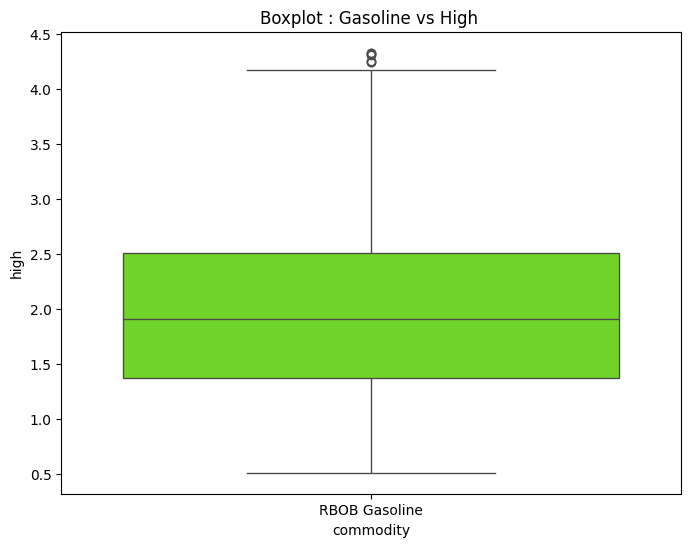

In [91]:
sns.boxplot(x = 'commodity'  , y = 'high' , data = RROB_gasoline_df , color = c_green )
plt.title('Boxplot : Gasoline vs High ')
rcParams['figure.figsize'] = 8,6
plt.show()

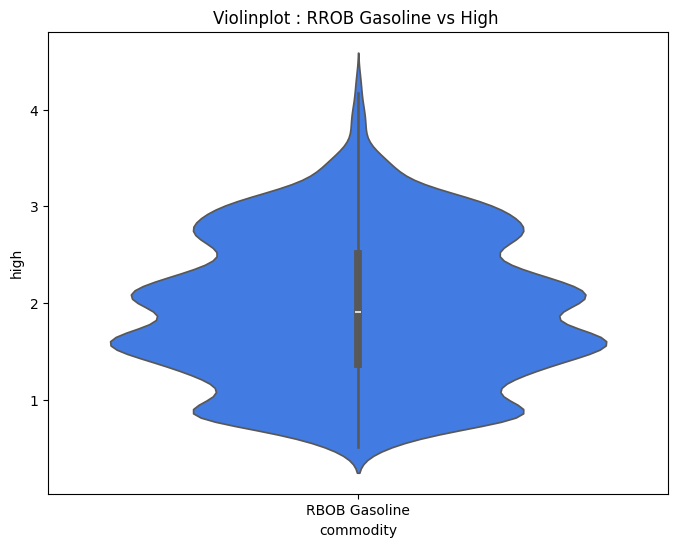

In [93]:
sns.violinplot(x = 'commodity' , y = 'high' , data = RROB_gasoline_df , color = c_blue_light)
plt.title('Violinplot : RROB Gasoline vs High ')
rcParams['figure.figsize'] = 8,6
plt.show()

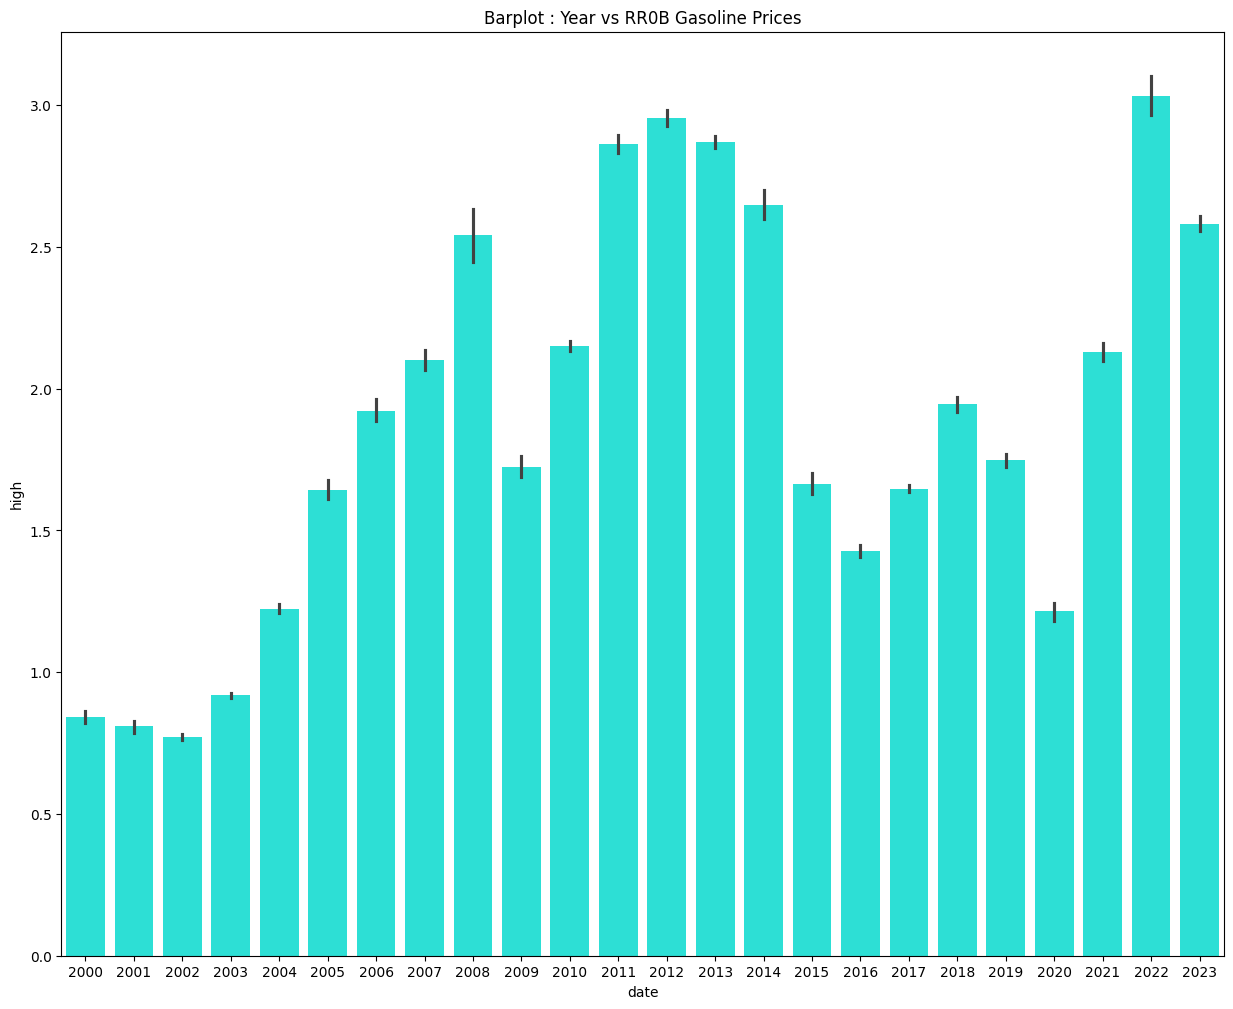

In [60]:
sns.barplot(x = pd.to_datetime(RROB_gasoline_df['date']).dt.year , y = 'high', data = RROB_gasoline_df , color = c_cyan )
rcParams['figure.figsize'] = 15,12
plt.title('Barplot : Year vs RR0B Gasoline Prices')
plt.show()

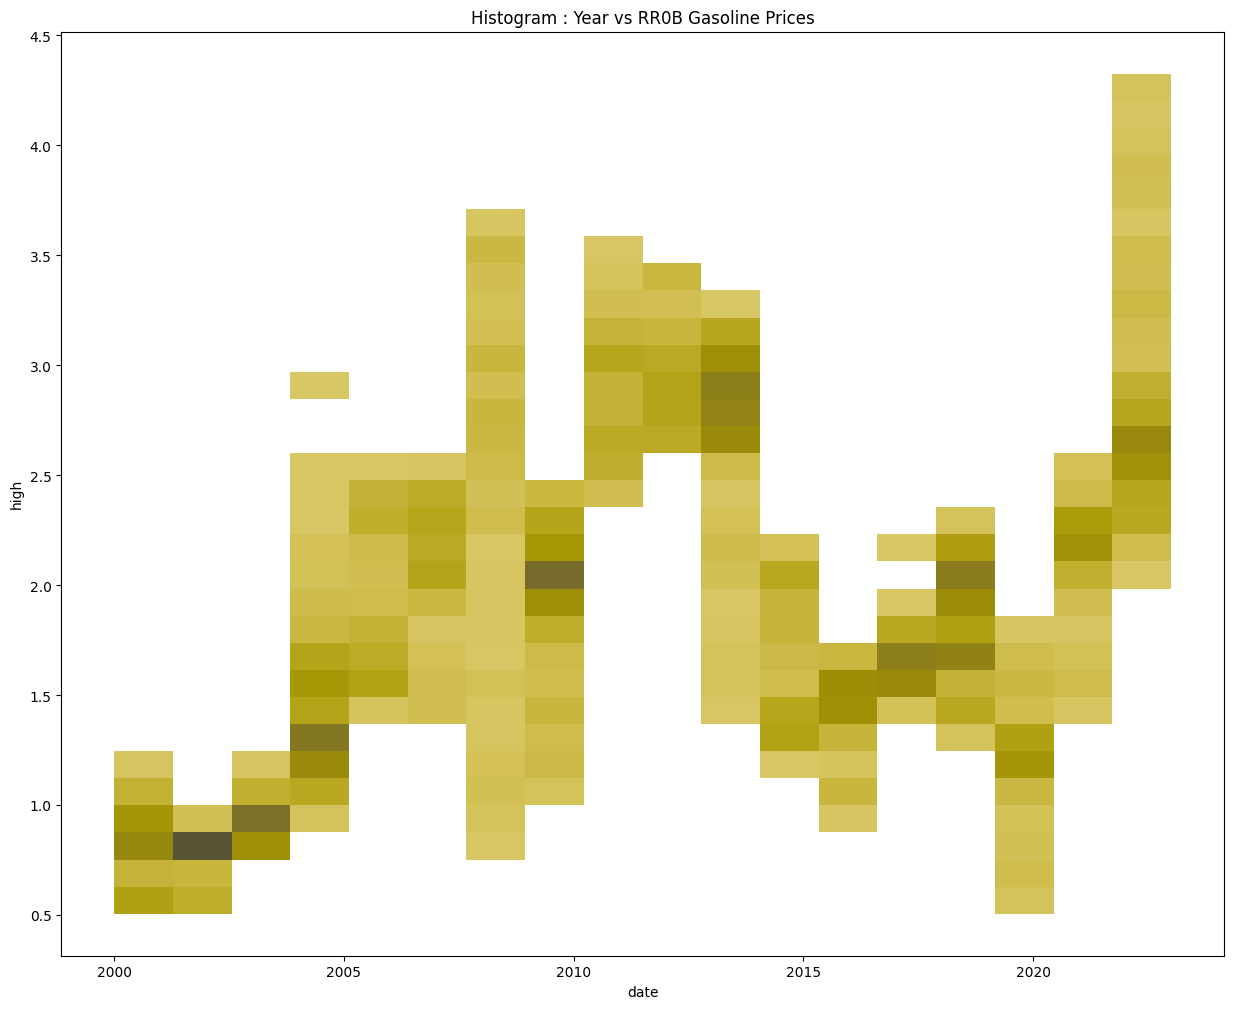

In [81]:
sns.histplot(x = pd.to_datetime(RROB_gasoline_df['date']).dt.year , y = 'high', data = RROB_gasoline_df , color = c_yellow ,  )
rcParams['figure.figsize'] = 15,12
plt.title('Histogram : Year vs RR0B Gasoline Prices')
plt.show()


In 2020, several interconnected factors contributed to the low gasoline prices:

1. **COVID-19 Pandemic:** The COVID-19 pandemic led to widespread lockdowns, travel restrictions, and a significant reduction in economic activities globally. This resulted in a sharp decline in the demand for oil, including gasoline, as people stayed home, and industries scaled back operations.

2. **Oversupply of Oil:** Prior to the pandemic, there was already an oversupply of oil in the global market. The disagreement between major oil-producing countries, particularly Russia and Saudi Arabia, on production cuts further exacerbated the oversupply situation. This led to a price war and a flood of oil in the market, causing prices to plummet.

3. **Storage Issues:** With the sudden drop in demand and the surplus of oil, storage facilities became overwhelmed. This led to a situation where there was limited capacity to store excess oil, causing further downward pressure on prices.

4. **Economic Uncertainty:** The economic uncertainty caused by the pandemic also contributed to a decline in oil prices. Investors and traders were concerned about the long-term impact of the crisis on global economic growth, leading to a sell-off in oil futures.

5. **Remote Work and Reduced Travel:** As remote work became more widespread and travel restrictions were implemented, there was a significant decrease in commuting and air travel. These changes directly impacted the demand for gasoline, leading to lower prices.

It's important to note that these factors were interconnected, and the combination of reduced demand, oversupply, and economic uncertainty created a unique situation in 2020. The oil and gas industry is highly dynamic, and prices can be influenced by various geopolitical, economic, and environmental factors. For the most current information, it is recommended to check the latest reports from reliable sources.


If there were increases in gasoline prices in 2022, the reasons could be multifaceted, and several factors might have contributed. Here are some common factors that can influence gasoline prices:

1. **Global Oil Prices:** Gasoline prices are closely tied to the global oil market. Changes in crude oil prices, which can be influenced by geopolitical events, production cuts, or increased demand, can impact the cost of refined products like gasoline.

2. **Supply and Demand Dynamics:** If demand for gasoline outpaces supply, prices are likely to rise. This could occur due to increased economic activity, growth in the transportation sector, or disruptions in oil production.

3. **Geopolitical Tensions:** Political instability or conflicts in major oil-producing regions can lead to concerns about oil supply disruptions, causing oil prices (and consequently gasoline prices) to increase.

4. **Production Costs:** The cost of refining, transportation, and distribution can impact gasoline prices. If these costs rise, they may contribute to higher prices at the pump.

5. **Currency Exchange Rates:** Changes in currency exchange rates can affect the cost of imported oil and refined products. If a country's currency weakens relative to others, it may lead to higher import costs and, consequently, higher gasoline prices.

6. **Environmental Regulations:** Stringent environmental regulations can require the use of specific additives or refining processes, which may increase production costs and potentially impact prices.

It's important to note that regional variations in gasoline prices exist, and factors affecting prices can differ based on local market conditions. For the most accurate and up-to-date information on gasoline prices in 2022, I recommend checking reputable sources such as government agencies, energy organizations, or financial news outlets that regularly report on oil and gas market developments.